# KLASIFIKASI HEWAN DI KEBUN BINATANG MENGGUNAKAN METODE ANN

# 1. Import Library



In [26]:
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.activations import relu

# 2. Import Dataset



In [27]:
dataset = pd.read_csv('zoo.csv')

In [28]:
dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# 3. Mengecek Informasi Dataset



In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# 4. Visualisasi data



In [30]:
All = dataset.shape[0]
class_type1 = dataset[dataset['class_type'] == 1]
class_type2 = dataset[dataset['class_type'] == 2]
class_type3 = dataset[dataset['class_type'] == 3]
class_type4 = dataset[dataset['class_type'] == 4]
class_type5 = dataset[dataset['class_type'] == 5]
class_type6 = dataset[dataset['class_type'] == 6]
class_type7 = dataset[dataset['class_type'] == 7]

o = len(class_type1)/All
p = len(class_type2)/All
q = len(class_type3)/All
r = len(class_type4)/All
s = len(class_type5)/All
t = len(class_type6)/All
u = len(class_type7)/All


print('class_tpye1 :',o*100,'%')
print('class_tpye2 :',p*100,'%')
print('class_tpye3 :',q*100,'%')
print('class_tpye4 :',r*100,'%')
print('class_tpye5 :',s*100,'%')
print('class_tpye6 :',t*100,'%')
print('class_tpye7 :',u*100,'%')

class_tpye1 : 40.5940594059406 %
class_tpye2 : 19.801980198019802 %
class_tpye3 : 4.9504950495049505 %
class_tpye4 : 12.871287128712872 %
class_tpye5 : 3.9603960396039604 %
class_tpye6 : 7.920792079207921 %
class_tpye7 : 9.900990099009901 %


Text(0, 0.5, 'Frequency')

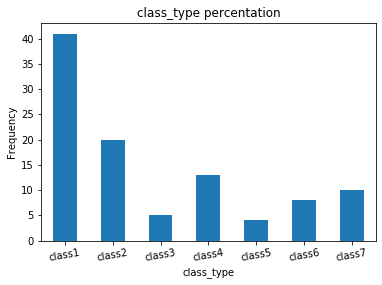

In [31]:
labels = ['class1','class2','class3','class4','class5','class6','class7']
classes = pd.value_counts(dataset['class_type'], sort = False)
classes.plot(kind = 'bar', rot=10)
plt.title("class_type percentation")
plt.xticks(range(7), labels)
plt.xlabel("class_type")
plt.ylabel("Frequency")

# 5. Menentukan Features dan Labels



In [32]:
X = dataset.iloc[:, 1:17].values
y = dataset.iloc[:, -1].values

In [33]:
y[:][y[:]==7]=int(0)
X[:,12][X[:,12]==2]=int(1)
X[:,12][X[:,12]==4]=int(2)
X[:,12][X[:,12]==6]=int(3)
X[:,12][X[:,12]==8]=int(4)

In [34]:
y_som = y

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
X12 = onehotencoder.fit_transform(X[:, 12].reshape(-1, 1)).toarray()
y = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integ

In [35]:
y = np.asarray(y, dtype = int)
X12 = np.asarray(X12, dtype = int)
Xnew = np.append(X, X12, axis=1)
X = np.delete(Xnew, 12, axis=1)

# 6. Splitting Data dan Modeling



In [36]:
from sklearn.model_selection import train_test_split
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y)

In [37]:
model = Sequential()
model.add(Dense(units = 100, kernel_initializer = 'uniform', activation = relu, input_dim = X_training.shape[1]))
model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = relu))
model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = relu))
model.add(Dropout(0.5))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer=Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.save('model.h5')

### Proses Epoch



In [38]:
acc_training = model.fit(X_training, y_training, validation_data=(X_testing, y_testing), batch_size = 50, epochs = 250)
acc_testing = model.evaluate(X_testing, y_testing)

Train on 80 samples, validate on 21 samples
Epoch 1/250
80/80 [==============================] - 0s 6ms/step - loss: 1.9458 - accuracy: 0.2625 - val_loss: 1.9451 - val_accuracy: 0.3810
Epoch 2/250
80/80 [==============================] - 0s 249us/step - loss: 1.9448 - accuracy: 0.4750 - val_loss: 1.9444 - val_accuracy: 0.3810
Epoch 3/250
80/80 [==============================] - 0s 566us/step - loss: 1.9441 - accuracy: 0.4375 - val_loss: 1.9435 - val_accuracy: 0.3810
Epoch 4/250
80/80 [==============================] - 0s 262us/step - loss: 1.9429 - accuracy: 0.4500 - val_loss: 1.9424 - val_accuracy: 0.3810
Epoch 5/250
80/80 [==============================] - 0s 262us/step - loss: 1.9417 - accuracy: 0.4250 - val_loss: 1.9412 - val_accuracy: 0.3810
Epoch 6/250
80/80 [==============================] - 0s 274us/step - loss: 1.9403 - accuracy: 0.4625 - val_loss: 1.9396 - val_accuracy: 0.3810
Epoch 7/250
80/80 [==============================] - 0s 192us/step - loss: 1.9385 - accuracy: 0.4125

Epoch 58/250
80/80 [==============================] - 0s 187us/step - loss: 0.8890 - accuracy: 0.5500 - val_loss: 0.8833 - val_accuracy: 0.5238
Epoch 59/250
80/80 [==============================] - 0s 461us/step - loss: 0.8884 - accuracy: 0.5375 - val_loss: 0.8565 - val_accuracy: 0.5238
Epoch 60/250
80/80 [==============================] - 0s 349us/step - loss: 0.9182 - accuracy: 0.5500 - val_loss: 0.8288 - val_accuracy: 0.5238
Epoch 61/250
80/80 [==============================] - 0s 237us/step - loss: 0.9041 - accuracy: 0.5500 - val_loss: 0.8064 - val_accuracy: 0.5238
Epoch 62/250
80/80 [==============================] - 0s 319us/step - loss: 0.8705 - accuracy: 0.5375 - val_loss: 0.7876 - val_accuracy: 0.5238
Epoch 63/250
80/80 [==============================] - 0s 262us/step - loss: 0.8325 - accuracy: 0.5500 - val_loss: 0.7729 - val_accuracy: 0.5714
Epoch 64/250
80/80 [==============================] - 0s 287us/step - loss: 0.8228 - accuracy: 0.5500 - val_loss: 0.7593 - val_accuracy:

Epoch 170/250
80/80 [==============================] - 0s 331us/step - loss: 0.2680 - accuracy: 0.7625 - val_loss: 0.2721 - val_accuracy: 0.7143
Epoch 171/250
80/80 [==============================] - 0s 125us/step - loss: 0.2788 - accuracy: 0.8000 - val_loss: 0.2701 - val_accuracy: 0.7143
Epoch 172/250
80/80 [==============================] - 0s 249us/step - loss: 0.2925 - accuracy: 0.7875 - val_loss: 0.2692 - val_accuracy: 0.7143
Epoch 173/250
80/80 [==============================] - 0s 736us/step - loss: 0.2476 - accuracy: 0.8000 - val_loss: 0.2690 - val_accuracy: 0.7143
Epoch 174/250
80/80 [==============================] - 0s 224us/step - loss: 0.2684 - accuracy: 0.8375 - val_loss: 0.2685 - val_accuracy: 0.7143
Epoch 175/250
80/80 [==============================] - 0s 524us/step - loss: 0.2550 - accuracy: 0.8000 - val_loss: 0.2689 - val_accuracy: 0.7143
Epoch 176/250
80/80 [==============================] - 0s 187us/step - loss: 0.3078 - accuracy: 0.7625 - val_loss: 0.2748 - val_ac

Epoch 226/250
80/80 [==============================] - 0s 274us/step - loss: 0.1020 - accuracy: 0.9500 - val_loss: 0.2699 - val_accuracy: 0.9524
Epoch 227/250
80/80 [==============================] - 0s 249us/step - loss: 0.0546 - accuracy: 0.9875 - val_loss: 0.2774 - val_accuracy: 0.9524
Epoch 228/250
80/80 [==============================] - 0s 324us/step - loss: 0.0655 - accuracy: 0.9750 - val_loss: 0.2788 - val_accuracy: 0.9524
Epoch 229/250
80/80 [==============================] - 0s 249us/step - loss: 0.0657 - accuracy: 0.9750 - val_loss: 0.2816 - val_accuracy: 0.9524
Epoch 230/250
80/80 [==============================] - 0s 287us/step - loss: 0.0723 - accuracy: 0.9875 - val_loss: 0.2878 - val_accuracy: 0.9524
Epoch 231/250
80/80 [==============================] - 0s 362us/step - loss: 0.0927 - accuracy: 0.9875 - val_loss: 0.2931 - val_accuracy: 0.9524
Epoch 232/250
80/80 [==============================] - 0s 324us/step - loss: 0.0646 - accuracy: 0.9750 - val_loss: 0.2966 - val_ac

### Akurasi



In [39]:
print('akurasinya sebesar {}'.format(acc_testing[1]))

akurasinya sebesar 0.9523809552192688


In [40]:
acc_training.history

{'val_loss': [1.9451452493667603,
  1.9443855285644531,
  1.9434831142425537,
  1.9424337148666382,
  1.941156268119812,
  1.9395822286605835,
  1.9376235008239746,
  1.9351155757904053,
  1.9318636655807495,
  1.9276148080825806,
  1.9220224618911743,
  1.9146413803100586,
  1.905030369758606,
  1.8926217555999756,
  1.8765476942062378,
  1.8561394214630127,
  1.8307255506515503,
  1.7993181943893433,
  1.7617558240890503,
  1.7181802988052368,
  1.669437050819397,
  1.6186548471450806,
  1.570391297340393,
  1.5285435914993286,
  1.4956083297729492,
  1.468777060508728,
  1.4428342580795288,
  1.4125328063964844,
  1.3806198835372925,
  1.346798300743103,
  1.3152049779891968,
  1.2889524698257446,
  1.2700166702270508,
  1.2556209564208984,
  1.2425165176391602,
  1.2298542261123657,
  1.2179621458053589,
  1.2087056636810303,
  1.1985807418823242,
  1.1874383687973022,
  1.1765007972717285,
  1.1653889417648315,
  1.15426766872406,
  1.1424182653427124,
  1.1293600797653198,
  1.11

# 7. Ploting Model Accuracy dan Loss Accuracy




##### Grafik dibawah ini adalah grafik hasil dari model akurasi

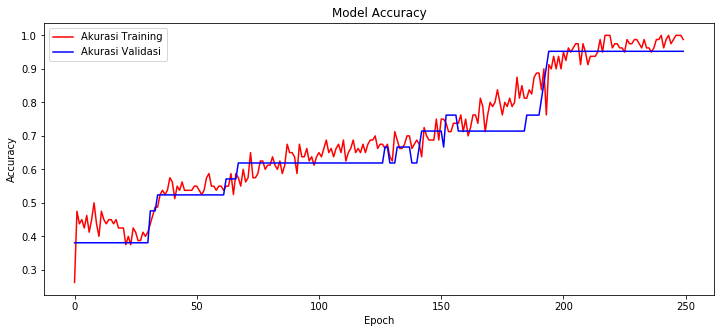

In [41]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

##### Grafik dibawah ini adalah grafik hasil dari loss akurasi

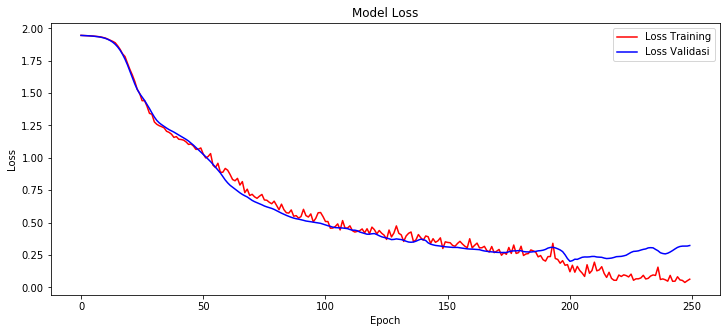

In [42]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

#### Model Predict dari data Training dan data Testing

In [43]:
y_pred = model.predict(X_training)
y_pred_test = model.predict(X_testing)

y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_test_cat = np.argmax(y_pred_test, axis=1)

y_training_cat = np.argmax(y_training, axis=1)
y_testing_cat = np.argmax(y_testing, axis=1)

# 8. Confusion Matriks



In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_training_cat, y_pred_cat)
cm_test = confusion_matrix(y_testing_cat, y_pred_test_cat)

In [45]:
print(cm)
print(cm_test)

[[ 8  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0]
 [ 0  0 16  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0 10  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  6]]
[[1 0 0 0 0 0 1]
 [0 8 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]


In [46]:
cm_count=0
cm_wrong=0
for i in range(len(cm)):
    cm_count += cm[i,i]
    for v in range(len(cm)):
        cm_wrong += cm[i,v]
cm_wrong -= cm_count

In [47]:
cm_test_count=0
cm_test_wrong=0
for i in range(len(cm_test)):
    cm_test_count += cm_test[i,i]
    for v in range(len(cm_test)):
        cm_test_wrong += cm_test[i,v]
cm_test_wrong -= cm_test_count

Dibawah ini adalah rumus untuk menghitung akurasi berdasarkan perhitungan Confusion matriks dan akurasi data Testing

In [48]:
accuracy = cm_count/(cm_count + cm_wrong)
accuracy_test = cm_test_count/(cm_test_count + cm_test_wrong)

Dan berikut ini adalah hasil akurasi dari perhitungan Confusion Matriks dan hasil akurasi testing pada proses Epoch sebelumnya

In [49]:
print(accuracy)
print(accuracy_test)

1.0
0.9523809523809523
